# 3.Bus EDA

## 3.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bus_df = pd.read_csv('./data/bus_cleaned.csv')

## 3.2 Overview

In [3]:
bus_df.head()

,exact_date,route_num,exact_time,day_of_week,location,incident,delay_min,gap_min,direction,vehicle,year,month,day,hour,min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N


In [4]:
print("There's %s records of incident and %s columns in the bus dataset."%(bus_df.shape[0],bus_df.shape[1]))

There's 466507 records of incident and 18 columns in the bus dataset.


In [5]:
print('The bus dataset starts from %s to %s.'%(bus_df.iloc[0]['exact_date'],bus_df.iloc[-1]['exact_date']))

The bus dataset starts from 2014-01-01 to 2020-08-15.


## 3.3 Check Missing values

In [6]:
missing_vals_bus = (bus_df.isnull().sum() / bus_df.shape[0]) * 100 
missing_vals_bus[missing_vals_bus > 0].sort_values(ascending=False)

vehicle           14.862799
direction          2.098361
direction_simp     0.466660
incident           0.199997
location           0.159483
gap_min            0.120899
dtype: float64

### Insights
- There's a lot of vehicle numbers missing in the bus dataset, about 15%.

In [7]:
bus_df.columns

Index(['exact_date', 'route_num', 'exact_time', 'day_of_week', 'location',
       'incident', 'delay_min', 'gap_min', 'direction', 'vehicle', 'year',
       'month', 'day', 'hour', 'min', 'at_station', 'delay_type',
       'direction_simp'],
      dtype='object')

## 3.4 Analyzing Continuous Variables (using distribution graphs, boxplots, quantiles and correlation matrix)

Continuous variables are: report_date, route_num, vehicle, year, month, day, hour, min, delay_min, gap_min

### 3.4.1 Delay by Exact Date Counts

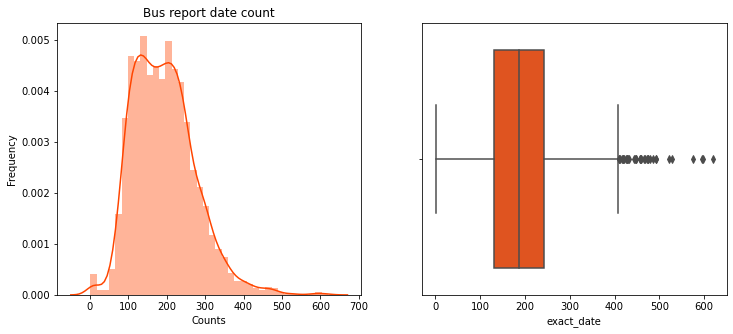

In [8]:
bus_date_counts = bus_df.exact_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Bus report date count");

sns.boxplot(bus_date_counts, ax=ax[1], color="orangered");

In [9]:
# a function to find quantiles, or where most data are.
def compute_quantiles(col_counts):
    Q1 =  np.quantile(col_counts, 0.25)
    Q3 =  np.quantile(col_counts, 0.75)
    IQR = Q3 - Q1
    print('Most data are within %d to %d.'%(Q1,Q3))
    print('Median is', np.quantile(col_counts, 0.5))
    print('The data are usually below %d.'%np.quantile(col_counts, 0.95))
    
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3  + 1.5 * (IQR)
    outlier = col_counts[col_counts < lower_fence].sum() + col_counts[col_counts > upper_fence].sum()
    print('Anything above %d and below %d is an outlier.'%(upper_fence,lower_fence))
    print("There are %d outliers." %outlier)
    print('Maximum occurence is %d of %s.' %(col_counts.max(), col_counts.index[0]))

In [10]:
compute_quantiles(bus_date_counts)

Most data are within 131 to 242.
Median is 186.0
The data are usually below 335.
Anything above 408 and below -35 is an outlier.
There are 16411 outliers.
Maximum occurence is 619 of 2014-01-07.


### Insights
- Most dates have range from roughly 135 to 240 delays.
- More than 340 delays per day is very seldom.
- The most delay per day happened in 2014-01-07 with 619 delays.
- There are 17226 outliers in this graph.

### 3.4.2 Delay by Exact Time Counts

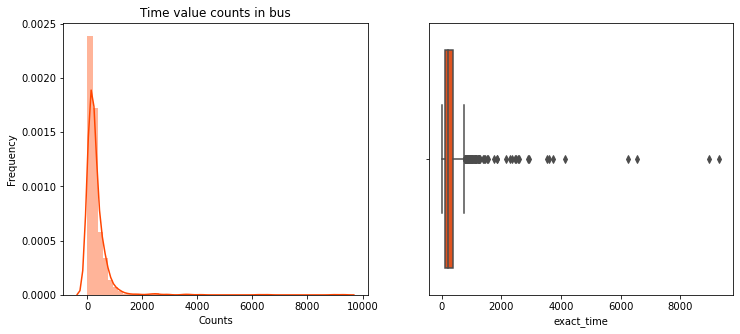

In [11]:
bus_time_counts = bus_df.exact_time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_time_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in bus");

sns.boxplot(bus_time_counts, ax=ax[1], color="orangered");

In [12]:
compute_quantiles(bus_time_counts)

Most data are within 106 to 364.
Median is 217.0
The data are usually below 829.
Anything above 752 and below -282 is an outlier.
There are 146267 outliers.
Maximum occurence is 9310 of 3:00:00 PM.


### Insights
- A heavily right skewed distribution shown above, this means that certain time has more delays than others. 
- There's a heavy outlier with 9280 delays at 3PM.
- Most of the time we have 105 to roughly 360 delays.

### 3.4.3 More on continuous variables

In [13]:
# initialize continuous variables
bus_cont = bus_df[['route_num','vehicle','year','month','day','hour','min','delay_min','gap_min']]

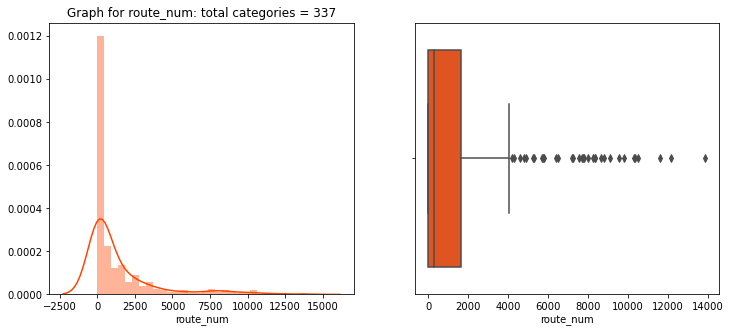

Most data are within 3 to 1654.
Median is 260.0
The data are usually below 7714.
Anything above 4130 and below -2473 is an outlier.
There are 256193 outliers.
Maximum occurence is 13861 of 29.




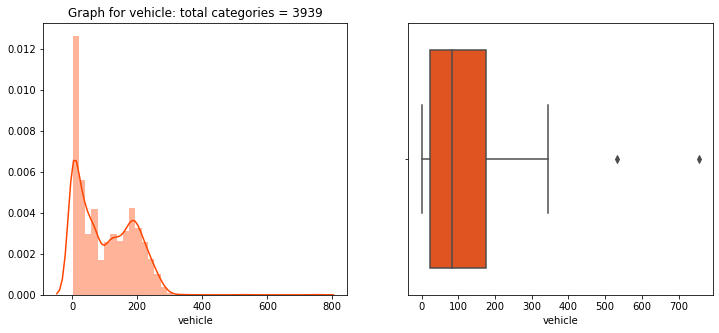

Most data are within 22 to 176.
Median is 83.0
The data are usually below 240.
Anything above 407 and below -209 is an outlier.
There are 1288 outliers.
Maximum occurence is 755 of 0.0.




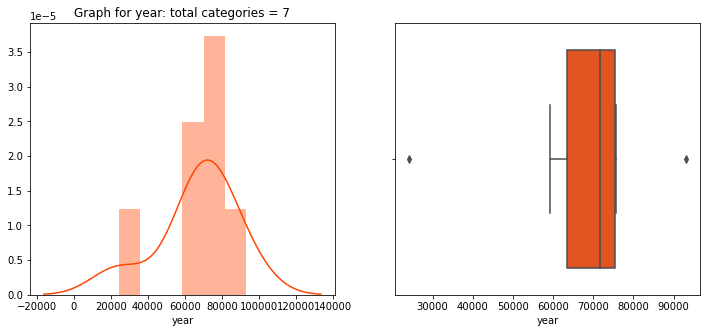

Most data are within 63484 to 75294.
Median is 71687.0
The data are usually below 87857.
Anything above 93009 and below 45769 is an outlier.
There are 117264 outliers.
Maximum occurence is 93090 of 2014.




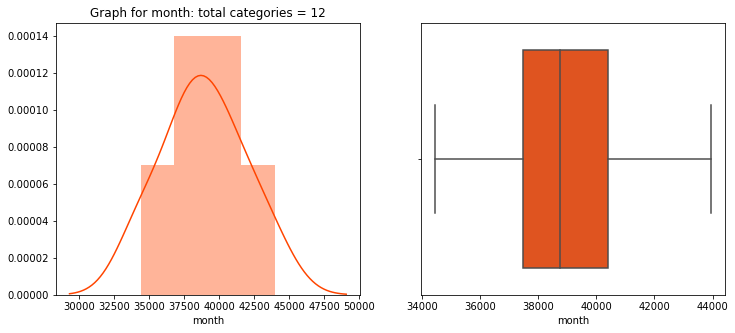

Most data are within 37471 to 40389.
Median is 38732.0
The data are usually below 43151.
Anything above 44766 and below 33095 is an outlier.
There are 0 outliers.
Maximum occurence is 43964 of 1.




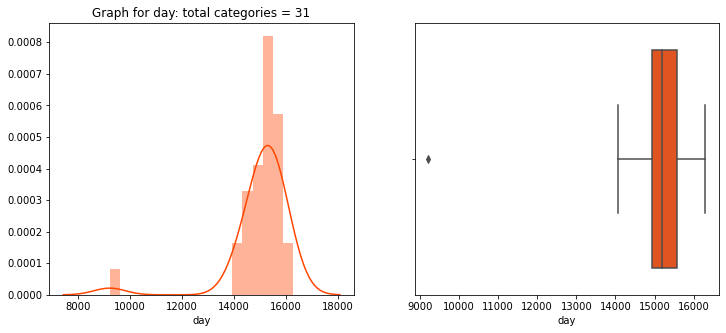

Most data are within 14943 to 15573.
Median is 15200.0
The data are usually below 15993.
Anything above 16517 and below 13999 is an outlier.
There are 9214 outliers.
Maximum occurence is 16294 of 12.




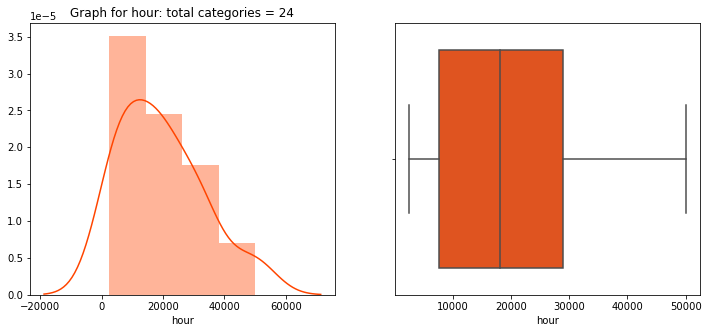

Most data are within 7679 to 28974.
Median is 18187.5
The data are usually below 46962.
Anything above 60917 and below -24263 is an outlier.
There are 0 outliers.
Maximum occurence is 50043 of 6.




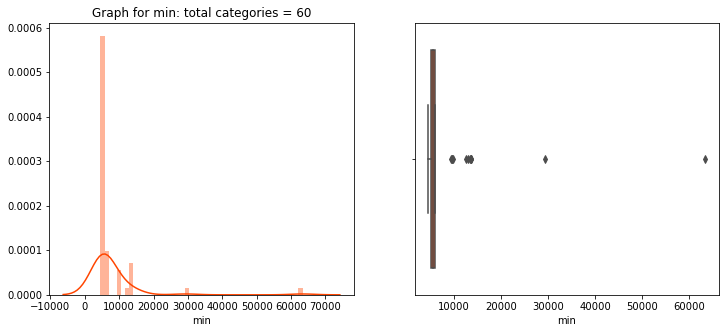

Most data are within 5137 to 5902.
Median is 5498.0
The data are usually below 13623.
Anything above 7049 and below 3989 is an outlier.
There are 210752 outliers.
Maximum occurence is 63321 of 0.




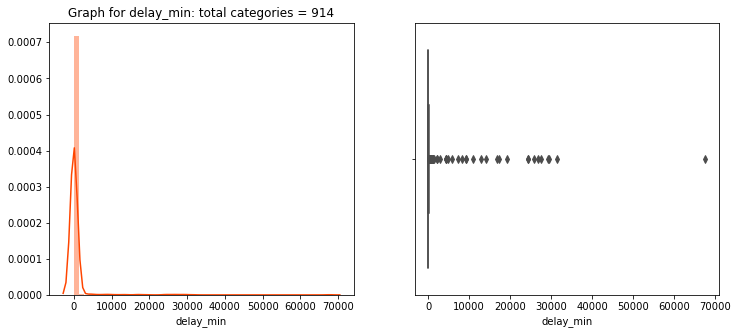

Most data are within 2 to 17.
Median is 4.0
The data are usually below 228.
Anything above 39 and below -20 is an outlier.
There are 461088 outliers.
Maximum occurence is 67630 of 10.0.




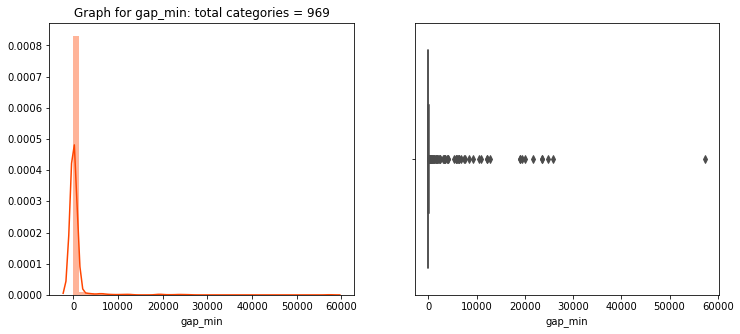

Most data are within 2 to 19.
Median is 5.0
The data are usually below 680.
Anything above 44 and below -23 is an outlier.
There are 459783 outliers.
Maximum occurence is 57377 of 20.0.




In [14]:
# Using a for loop to plot each continous variables and compute quantiles.
for col in bus_cont.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    cont_num = bus_cont[col].value_counts()
    chart = sns.distplot(cont_num, ax=ax[0], color="orangered", kde=True)
    ax[0].set_title("Graph for %s: total categories = %d" %(col, len(cont_num)))
    sns.boxplot(cont_num, ax=ax[1], color="orangered")
    plt.show()

    compute_quantiles(cont_num)
    print('\n')

### Insights

Most graphs have a heavily skewed distribution, for example:
- The 29 Dufferin bus route number has 1390 records of delay compare to most bus routes only have between 3 to roughly 1650 records of delay.
- Day 12 has 16100 records of delay.
- Most delays are recorded at exactly 0 minute of the hour.
- Most delays are 10 minutes long with 67000 occurences.
- Most gaps are 20 mins long with 57000 occurences.

The relatively normal distributed graphs are:
- The graph for year shows that 2014 has the most recorded delays being 93000, where most years usually have between 63500 to 75000 delays.
- The graph for month has 0 outliers and January being having the most recorded delay month with 44000 records.
- 6 AM has 49700 records of delay where most periods only have between 7600 to 29000 delays.


### 3.4.4 Correlation Matrix

<AxesSubplot:>

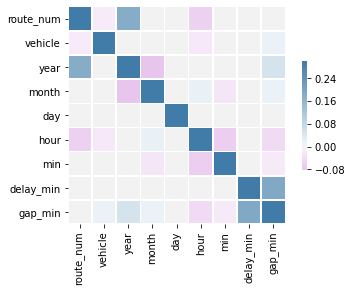

In [15]:
# check correlations between continuous variables
cmap = sns.diverging_palette(660, 600, as_cmap=True)
sns.heatmap(bus_cont.corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights:

- There's a positive correlation between route number and year, although it's unclear of what this mean. 
- Gaps and delays are positively correlated, intuitively speaking that a long delay results in a long gap time from the bus ahead of the following bus.
- There are no signs showing that delays have any correlation other than gap time.

## 3.5 Analyzing Categorical Variables (using bar graphs)

In [16]:
# dataframe for categorical variables
bus_cat = bus_df[['year','month','day','hour','day_of_week', 'incident', 'at_station', 'direction_simp', 'delay_type']]

### 3.5.1 Bar graphs

Graph for year: total categories = 7


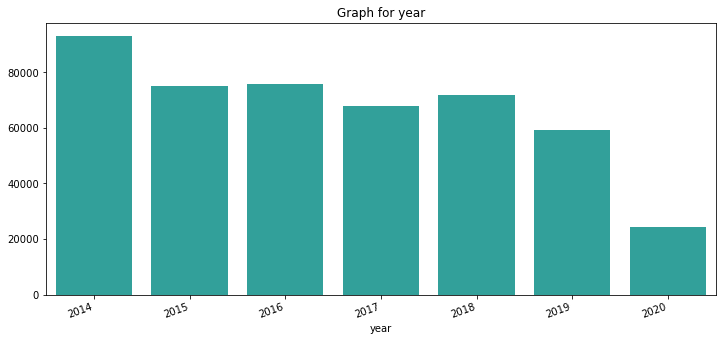

Graph for month: total categories = 12


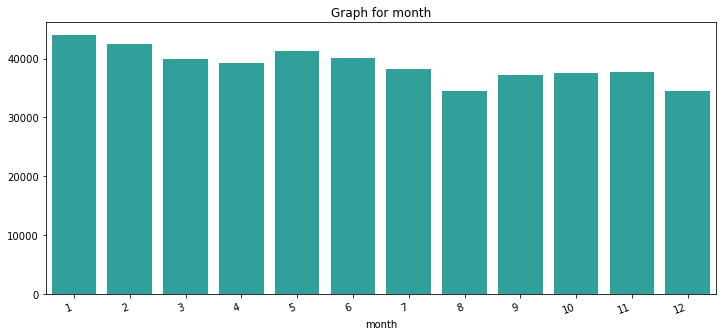

Graph for day: total categories = 31


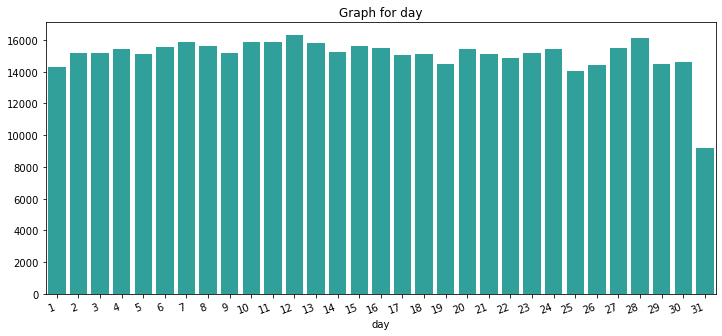

Graph for hour: total categories = 24


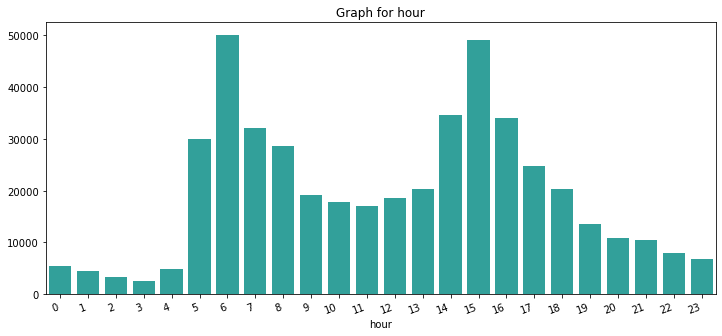

Graph for day_of_week: total categories = 7


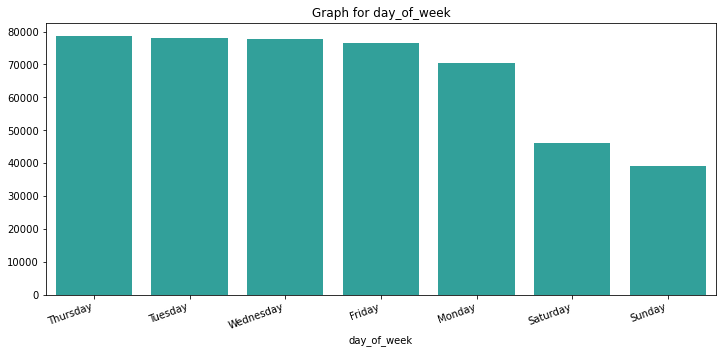

Graph for incident: total categories = 13


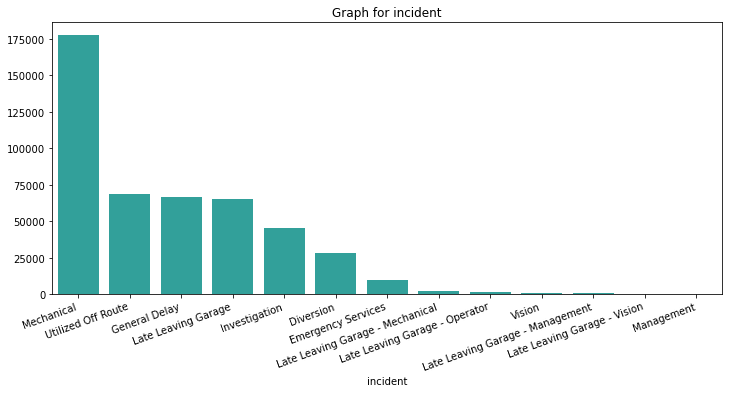

Graph for at_station: total categories = 2


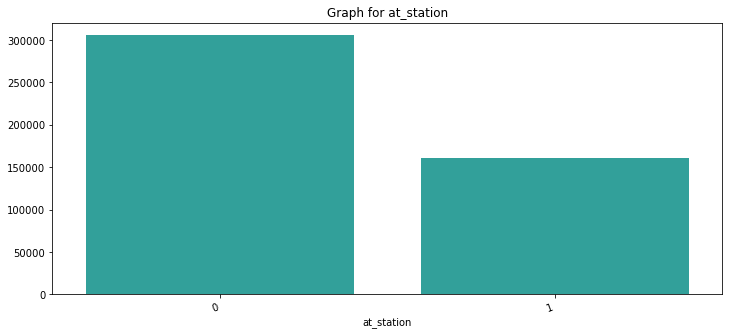

Graph for direction_simp: total categories = 5


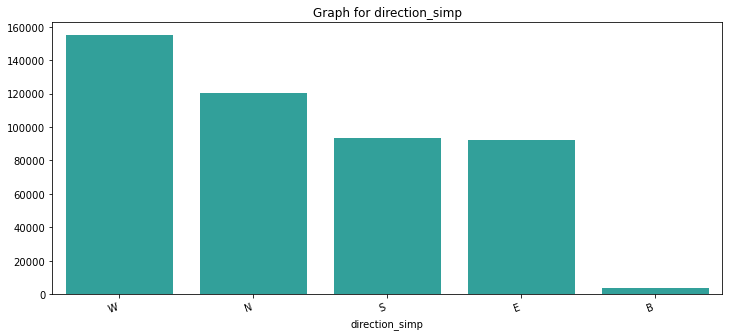

Graph for delay_type: total categories = 4


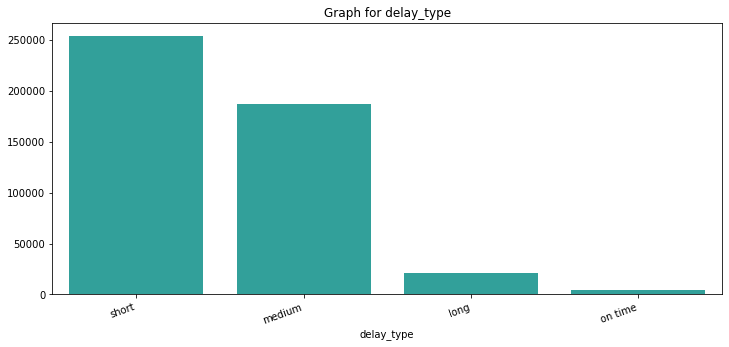

In [17]:
# Using a for loop to plot each categorical variable.
for col in bus_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = bus_cat[col].value_counts()
    print("Graph for %s: total categories = %d" %(col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,color="lightseagreen")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.ylabel("")
    plt.xlabel(col)
    plt.title("Graph for %s" %(col))
    plt.show()

### Insights
Graph for year:
- 2014 has the most number of delay recorded.
- 2015 to 2019 has a relatively even distribution of delays recorded.
- Although 2020 has the least number of delay recorded, keep in mind that we only have 6 months of data from 2020 and there's a pandemic in this year.

Graph for month:
- January being the peak of this graph might be a sign of holiday effect.

Graph for day:
- We observe that day 12 and day 28 peaked at this graph meaning that delays are more likely to happen in the middle and the end of the month.

Graph of hour:
- 6 AM and 3 PM have the most recorded delays. Midnight to 4 AM have the least record of delays.

Graph for day of the week:
- We observe that the weekdays have almost twice more delays than weekends.

Graph for incident:
- Mechanical incident dominates this graph being the incident with most delay counts and more than twice of the second place incident.
- Anything with a combination of late leaving garage, or vision and management almost have no effects to the bus delays.

Graph for at_station:
- This graph shows that almost roughly 300000 buses weren't delay at stations whereas 150000 were delay at stations.

Graph for direction:
- More buses are like to be delayed going west followed by north, south and east.
- Buses going both ways are not likely to be delay as there are not many buses operate on going both ways.

Graph for delay type:
- Most delays are relatively short range from 0 to 10 mins
- Not many record in this dataset are recorded as 0 minute delay in this case compare to the subway dataset.

## 3.6 Top 20 Location and Bus Route (using count plots)

### 3.6.1 Top 20 Location

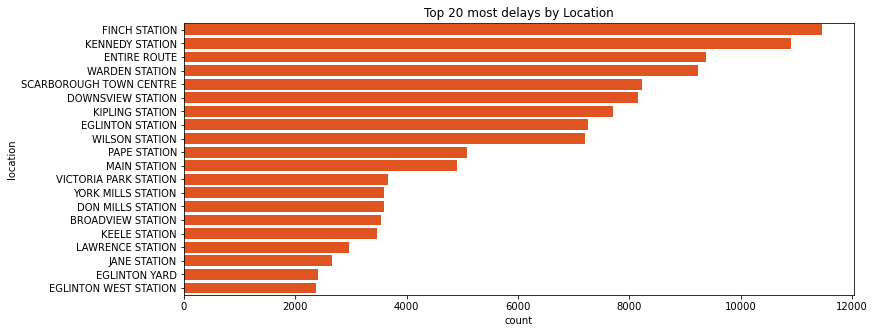

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(y=bus_df.location, order= bus_df.location.value_counts().iloc[:20].index, color="orangered");
plt.title("Top 20 most delays by Location");

### 3.6.2 Top 20 Bus Route

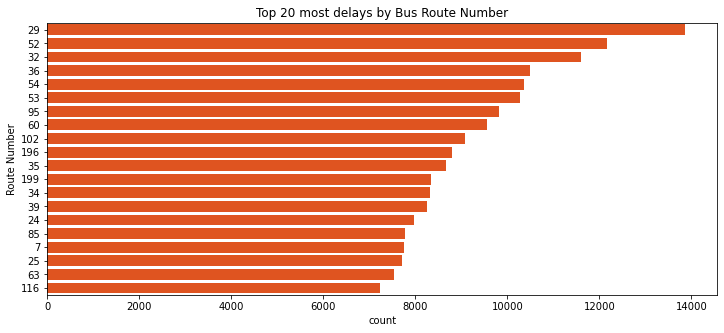

In [19]:
plt.figure(figsize=(12,5))

sns.countplot(y=bus_df.route_num, order= bus_df.route_num.value_counts().iloc[:20].index, color="orangered");
plt.title("Top 20 most delays by Bus Route Number");
plt.ylabel('Route Number');

## 3.7 Comparing delays vs others (using bar graphs)

### 3.7.1 Delays vs Day of the Week

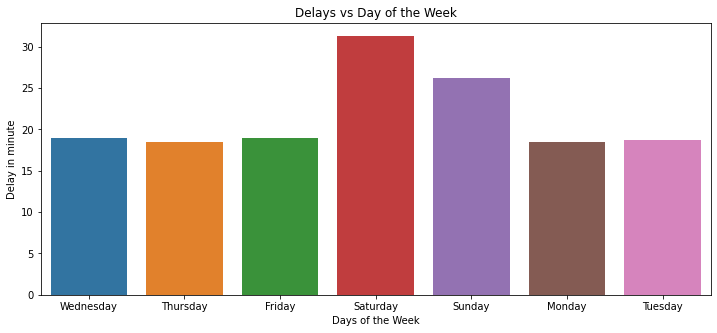

In [20]:
plt.figure(figsize=(12,5));
sns.barplot(x='day_of_week', y='delay_min', data= bus_df, ci=None);
plt.title("Delays vs Day of the Week");
plt.xlabel("Days of the Week");
plt.ylabel("Delay in minute");

### Insights
- From our previous countplot, we saw that weekdays have more delays than weekends, but looking at this graph we can tell that weekends are rougly 5 to 10 minutes longer than weekdays.

### 3.7.2 Delays vs Incident

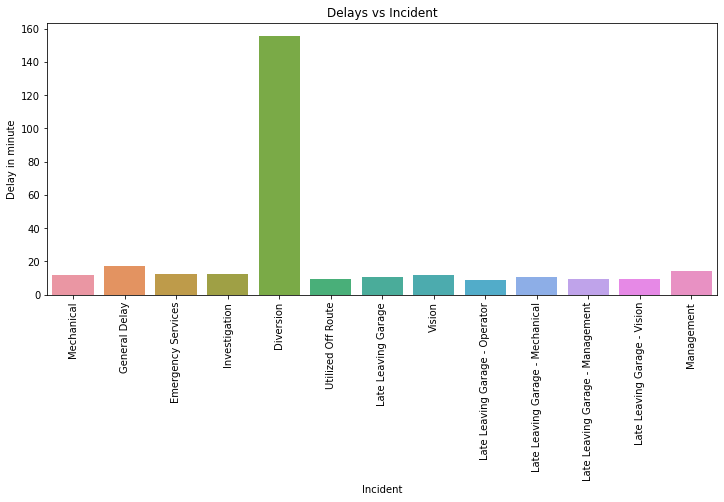

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x='incident', y='delay_min', data= bus_df, ci=None);
plt.title("Delays vs Incident")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");
plt.xticks(rotation= 90);

### Insights
- Buses had diversion incidents could be 160 minutes late for schedule, that's insane!
- On the other hand, the rest of the incidents took a much more reasonable delay time (less than 20 minutes).

### 3.7.3 Delays vs Hour

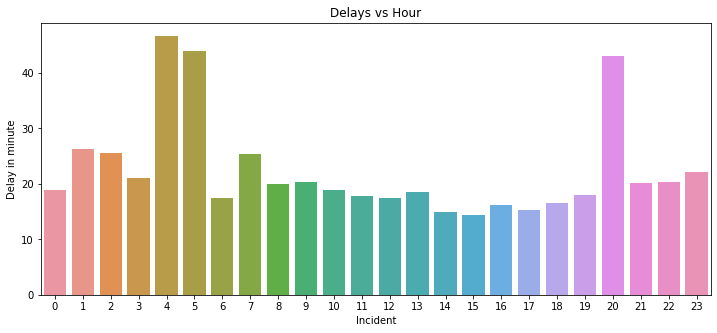

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='hour', y='delay_min', data= bus_df, ci=None);
plt.title("Delays vs Hour")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");

### Insights
- Delay at 4 - 5 AM and 8 PM took more than 40 minutes.
- Previously, we observed that 6 AM and 3 PM had the most number of delays. Fortunately, in this graph, we see that the delay time during busier (or rush) hours had relatively shorter delay times.

### 3.7.4 Delays vs Direction

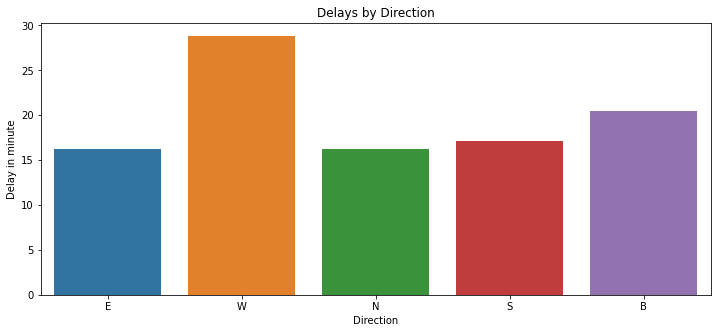

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='direction_simp', y='delay_min', data= bus_df, ci=None);
plt.title("Delays by Direction")
plt.xlabel("Direction")
plt.ylabel("Delay in minute");

### Insights
- Not only buses headed west took the longest time, they also happened very frequently.
- Surprisingly, buses going both ways are second in this graph, but they didn't happen as frequently as the buses went other directions.

### 3.7.5 Delays vs Days of the Week and Direction

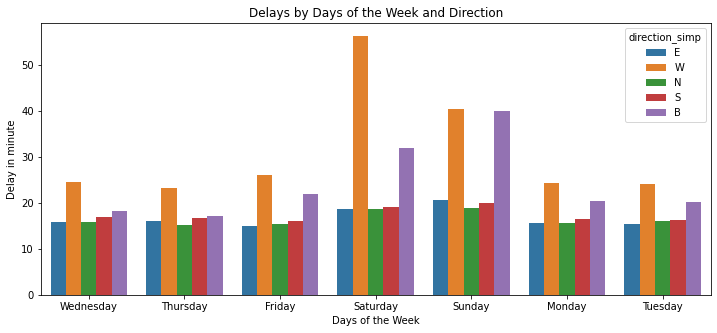

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x='day_of_week', y='delay_min',hue='direction_simp', data= bus_df, ci=None);
plt.title("Delays by Days of the Week and Direction")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");

### Insights
- Buses headed west took the longest time in every single day of the week and much longer on the weekends.

## 3.8 Using WordCloud to visualize what is the most frequent recorded Location 

In [25]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
# Discard null values in location column
bus_df_notna = bus_df[bus_df['location'].notna()]

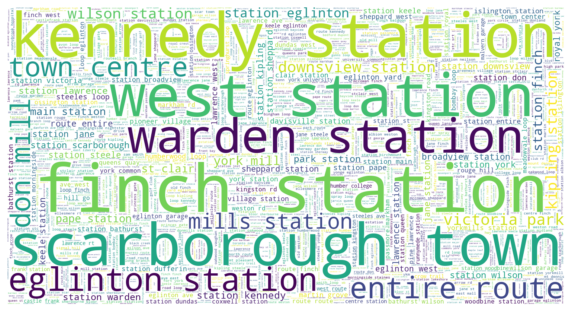

In [27]:
# Code is from Ken Jee
words = " ".join(bus_df_notna['location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered]) 

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()